# EDA Chest Pain
[comment]: <> (by: Matt Bowman)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 

## Import

In [2]:
base_dir = '../EDA/CDC/shotgun_approach/'

def import_dataset(name,col_dic=None):
    df = pd.read_sas(base_dir+name+'.XPT')
    if col_dic==None:
        return df
    else: 
        return df[[*col_dic]].rename(columns=col_dic)


In [3]:
df = pd.read_csv('../Heart Disease Prediction/has_heart_disease.csv')
df = df.drop(columns='Unnamed: 0')

In [4]:
df_cdq = import_dataset('CDQ_E',{
    'SEQN':'SEQN',
    'CDQ008':'Chest_pain'
})

In [5]:
df_cdq.head()

,SEQN,Chest_pain
0,41475.0,2.0
1,41477.0,NaN
2,41479.0,NaN
3,41482.0,NaN
4,41483.0,2.0


## Checking & Cleaning

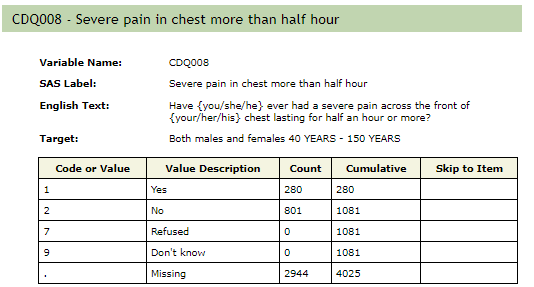

In [6]:
df_cdq['Chest_pain'] = df_cdq['Chest_pain'].replace([2,7,9],[0,np.nan,np.nan])
df_cdq['Chest_pain'].unique()

array([ 0., nan,  1.])

In [7]:
df_cdq.head(3)

,SEQN,Chest_pain
0,41475.0,0.0
1,41477.0,NaN
2,41479.0,NaN


In [8]:
df_merge = df.merge(right=df_cdq,on='SEQN',how='inner')
df_merge

,SEQN,HasHeartDisease,Chest_pain
0,41475.0,0,0.0
1,41477.0,0,NaN
2,41479.0,0,NaN
3,41482.0,0,NaN
4,41483.0,0,0.0
...,...,...,...
3993,51618.0,0,0.0
3994,51619.0,0,NaN
3995,51620.0,0,NaN
3996,51622.0,0,NaN


## Visualising Relationship

In [9]:
df_merge.drop(columns='SEQN').corr()['HasHeartDisease']

HasHeartDisease    1.000000
Chest_pain         0.220461
Name: HasHeartDisease, dtype: float64

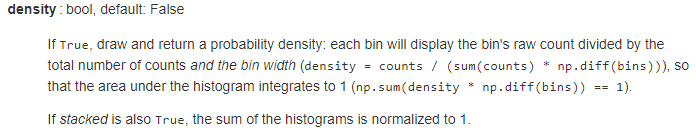

Text(0.5, 1.0, 'Chest Pain')

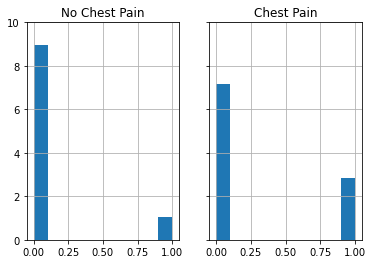

In [31]:
# df_merge['HasHeartDisease'].hist(df_merge['Chest_pain']==1,density=True,set_ylim=[10,10])

df_have_chest_pain = df_merge.loc[df_merge['Chest_pain']==1,'HasHeartDisease']
df_no_chest_pain = df_merge.loc[df_merge['Chest_pain']==0,'HasHeartDisease']

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True) # (row, column, index)
ax1.hist(df_no_chest_pain,density=True)
ax1.grid(True)
ax1.set_title('No Chest Pain')
ax2.hist(df_have_chest_pain,density=True)
ax2.set_ylim([0,10])
ax2.grid(True)
ax2.set_title('Chest Pain')

In [32]:
df_merge.drop(columns='SEQN').groupby(by='Chest_pain', dropna=True)['HasHeartDisease'].value_counts(normalize=False)

Chest_pain  HasHeartDisease
0.0         0                  709
            1                   82
1.0         0                  197
            1                   78
Name: HasHeartDisease, dtype: int64

Below is a normalised table. i.e. values are percentage split between each subgroup: 

In [33]:
df_merge.drop(columns='SEQN').groupby(by='Chest_pain', dropna=True)['HasHeartDisease'].value_counts(normalize=True).round(2)

Chest_pain  HasHeartDisease
0.0         0                  0.90
            1                  0.10
1.0         0                  0.72
            1                  0.28
Name: HasHeartDisease, dtype: float64

In [34]:
# Selfchecking values
total_count = df_merge['Chest_pain'].dropna().shape[0]
print(f'The total count of people with or without chest pain (excluding NaNs) is {total_count}')

The total count of people with or without chest pain (excluding NaNs) is 1066


**Key features we are seeing here are:** 
* It is hard to tell if you have chest pain are you more likely to have heart disease

No need for proportion test given the distribution is clear. 